In [1]:
import time
import warnings

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [3]:
cancer = load_breast_cancer()
col_names = list(cancer.feature_names)
col_names.append('target')
data = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [4]:
# fn = 'voice.csv'
# data = pd.read_csv(fn)
# data.head()

In [5]:
data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

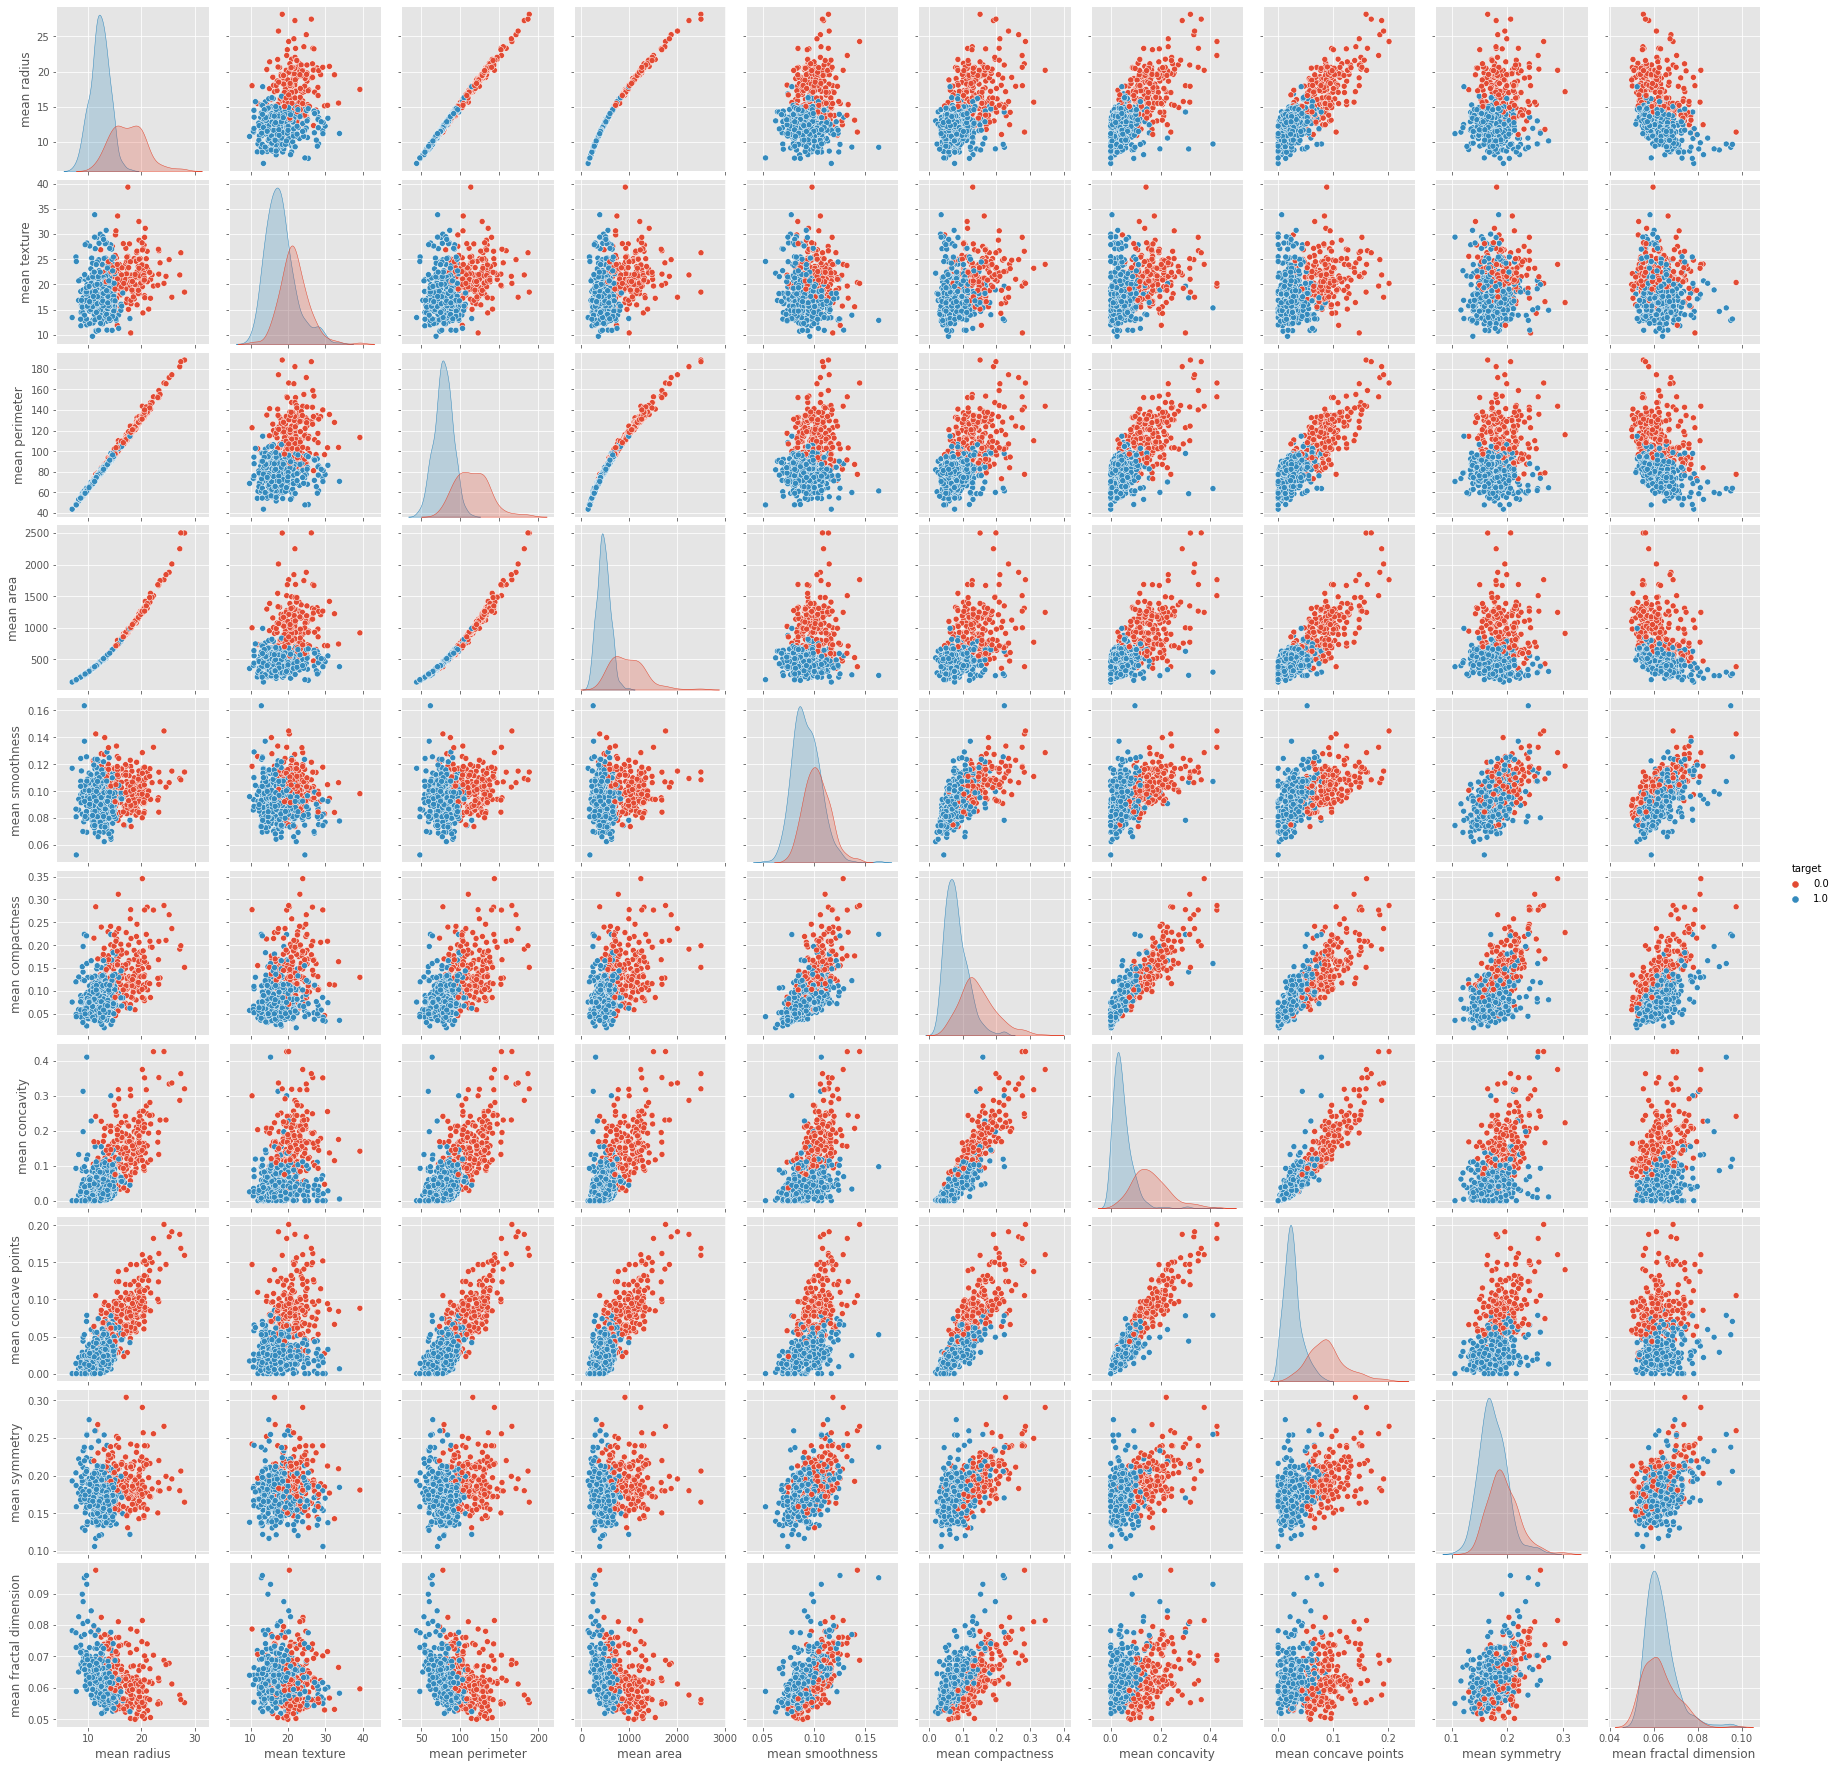

In [8]:
sns.pairplot(data, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

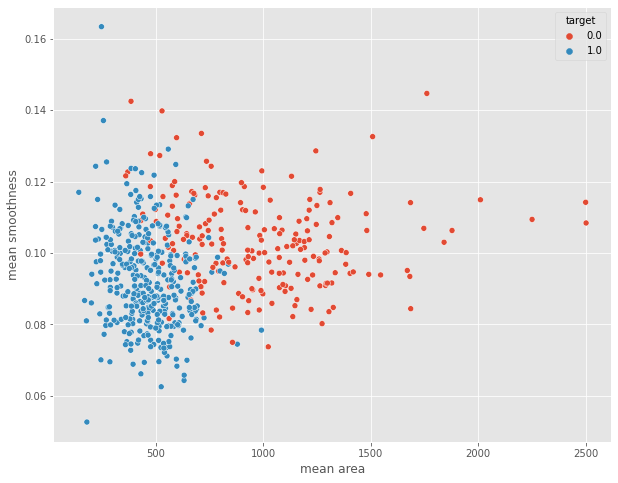

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = data)

<AxesSubplot:>

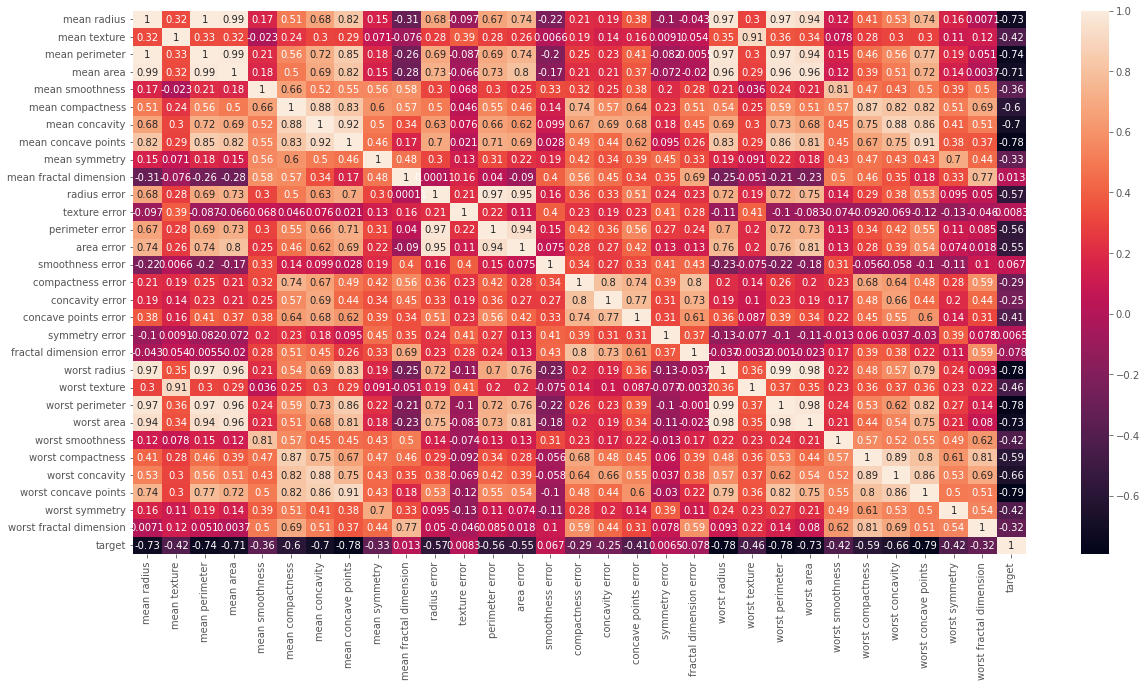

In [10]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True) 

# m

In [11]:
x = data.iloc[:, :30].to_numpy()
y = data.target.to_numpy()
data.to_numpy().shape, x.shape, y.shape

((569, 31), (569, 30), (569,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [13]:
pca = PCA(n_components = 3)
pca.fit(x_train)
x_train_ld = pca.transform(x_train)
x_test_ld = pca.transform(x_test)
x_train_ld.shape, x_test_ld.shape

((455, 3), (114, 3))

# m

In [14]:
svmc = SVC(kernel='linear')
svmc.fit(x_train_ld, y_train)
y_pred_ld = svmc.predict(x_test_ld)
y_test.shape, y_pred_ld.shape

((114,), (114,))

In [15]:
svmc_sv = svmc.support_vectors_
#Ax + By + Cz + D = 0
A, B, C = svmc.coef_[0][0], svmc.coef_[0][1], svmc.coef_[0][2]
D = svmc.intercept_[0]

In [16]:
t = 'ggplot2'
fig1 = px.scatter_3d(x=x_train_ld.T[0], y=x_train_ld.T[1], z=x_train_ld.T[2], color=y_train, template=t)
fig1.update_traces(marker=dict(size=4.5,line=dict(width=1, color='white')),
                  selector=dict(mode='markers'))

fig2 = px.scatter_3d(x=svmc_sv.T[0], y=svmc_sv.T[1], z=svmc_sv.T[2], template=t)
fig2.update_traces(marker=dict(size=4.5,line=dict(width=1, color='white')),
                  selector=dict(mode='markers'))

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [17]:
X_train = x_train.copy()
X_test = x_test.copy()
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [18]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.97%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.915663    0.937716   0.92967    0.926689      0.929476
recall       0.894118    0.950877   0.92967    0.922497      0.929670
f1-score     0.904762    0.944251   0.92967    0.924506      0.929497
support    170.000000  285.000000   0.92967  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[152  18]
 [ 14 271]]

Test Result:
Accuracy Score: 93.86%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   0.926829   0.945205  0.938596    0.936017      0.938435
recall      0.904762   0.958333  0.938596    0.931548      0.938596
f1-score    0.915663   0.951724  0.938596    0.933693      0.938438
support    42.000000  72.000000  0.938596  114.000000    114.000000
___

In [19]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.14%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.964497    0.975524  0.971429    0.970011      0.971404
recall       0.958824    0.978947  0.971429    0.968885      0.971429
f1-score     0.961652    0.977233  0.971429    0.969442      0.971411
support    170.000000  285.000000  0.971429  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[163   7]
 [  6 279]]

Test Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   0.904762   0.944444  0.929825    0.924603      0.929825
recall      0.904762   0.944444  0.929825    0.924603      0.929825
f1-score    0.904762   0.944444  0.929825    0.924603      0.929825
support    42.000000  72.000000  0.929825  114.000000    114.000000
___

In [20]:
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 62.64%
_______________________________________________
CLASSIFICATION REPORT:
             0.0         1.0  accuracy   macro avg  weighted avg
precision    0.0    0.626374  0.626374    0.313187      0.392344
recall       0.0    1.000000  0.626374    0.500000      0.626374
f1-score     0.0    0.770270  0.626374    0.385135      0.482477
support    170.0  285.000000  0.626374  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[  0 170]
 [  0 285]]

Test Result:
Accuracy Score: 63.16%
_______________________________________________
CLASSIFICATION REPORT:
            0.0        1.0  accuracy   macro avg  weighted avg
precision   0.0   0.631579  0.631579    0.315789      0.398892
recall      0.0   1.000000  0.631579    0.500000      0.631579
f1-score    0.0   0.774194  0.631579    0.387097      0.488964
support    42.0  72.000000  0.631579  114.000000    114.000000
_______________________________________________
Confu

In [21]:
svc = SVC()
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, )

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
gs_bp = grid_svc.best_params_
grid_svc.best_params_

In [ ]:
svc2 = SVC(C = gs_bp['C'], gamma =  gs_bp['gamma'], kernel= gs_bp['kernel'])
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))